In [16]:
pip install pyvo

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import requests
from pyvo.dal import sia  #new! for what? Simple Image Access

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, Angle
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS


import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

In [19]:
!pip install photutils

In [20]:
import sys
import os
import cv2
sys.path.append(os.path.join('C:/', 'Users', 'ASUS', 'Documents', 'GitHub', 'satmetrics'))
import line_detection_updated as ld
from photutils.background import Background2D

In [21]:
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

In [22]:
ra = 9.854641111
dec = -8.973971944
image_table_958013 = svc_nsa.search((ra, dec)).to_table()

In [23]:
image_table_958013

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20190824t055732,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_osj_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,423832,,,3,0,0,2,[24 9314],,,[0.27066],,ct4m20190824t055732,,2019A-0308,archival,,,DECam,i,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_190824_055732_osj_i_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_osj_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.67821,-9.30926,--,,,--,7100.0,8570.0,--,--,--,--,--,--,,,,A85,1.13,2019A-0308,30.917,image1,0,4.52362,,1540,,Stack,2019-08-24T05:57:32.932637,558719.24829783,0
ct4m20190824t055732,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_osi_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,424110,,,3,0,0,2,[24 9314],,,[0.27066],,ct4m20190824t055732,,2019A-0308,archival,,,DECam,i,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_190824_055732_osi_i_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_osi_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.67821,-9.30926,--,,,--,7100.0,8570.0,--,--,--,--,--,--,,,,A85,1.13,2019A-0308,30.917,image,0,4.52362,,1540,,Stack,2019-08-24T05:57:32.932637,558719.24829783,0
ct4m20190824t055732,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_ose_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,16149,,,3,0,0,2,[8 9314],,,[0.27066],,ct4m20190824t055732,,2019A-0308,archival,,,DECam,i,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_190824_055732_ose_i_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_ose_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.67821,-9.30926,--,,,--,7100.0,8570.0,--,--,--,--,--,--,,,,A85,1.13,2019A-0308,30.917,expmap,0,4.52362,,1540,,Stack,2019-08-24T05:57:32.932637,558719.24829783,0
ct4m20190824t055732,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_osd_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,1186,,,3,0,0,2,[8 9314],,,[0.27066],,ct4m20190824t055732,,2019A-0308,archival,,,DECam,i,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_190824_055732_osd_i_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_osd_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.67821,-9.30926,--,,,--,7100.0,8570.0,--,--,--,--,--,--,,,,A85,1.13,2019A-0308,30.917,dqmask,0,4.52362,,1540,,Stack,2019-08-24T05:57:32.932637,558719.24829783,0
ct4m20190824t055732,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_190824_055732_osw_i_v1.fits.fz&extn=6&POS=9.854

In [24]:
image_table_958013.columns

<TableColumns names=('assoc_id','access_url','access_format','access_estsize','dataproduct_type','dataproduct_subtype','calib_level','dataset_length','im_nsubarrays','im_naxes','im_naxis','im_pixtype','im_wcsaxes','im_scale','obs_title','obs_id','obs_creator_name','obs_collection','obs_creation_type','obs_creation_date','facility_name','instrument_name','obs_bandpass','obs_datasource','proposal_id','obs_publisher_did','obs_release_date','preview','target_name','target_class','s_ra','s_dec','s_fov','s_region','s_calib_status','s_resolution','em_min','em_max','em_resolution','em_res_power','t_min','t_max','t_exptime','t_resolution','o_ucd','o_unit','pol_states','object','airmass','project_code','magzero','prodtype','seeing','fwhm','fileset_id','exptime','photflag','proctype','date_obs','mjd_obs','elliptic')>

In [25]:
instcal_filter = (image_table_958013['proctype'] == 'InstCal')
image_table_958013_instcals = image_table_958013[instcal_filter]

In [26]:
image_table_958013_instcals

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20141024t040623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_041530_oow_u_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,144990,,,2,0,0,2,[32 4094],,,[-0.13196],,ct4m20141024t040623,,2014B-0265,archival,,,DECam,u,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_041530_oow_u_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_041530_oow_u_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71779,-9.01156,--,,,--,1000.0,1000.0,--,--,--,--,--,--,,,,Abell 85,1.09,2014B-0265,27.819,wtmap,0.466,0,,500,,InstCal,2014-10-24T04:06:23.553680,556954.17110595,0
ct4m20141024t040623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_041530_ooi_u_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,307780,,,2,0,0,2,[24 4094],,,[-0.13196],,ct4m20141024t040623,,2014B-0265,archival,,,DECam,u,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_041530_ooi_u_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_041530_ooi_u_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71779,-9.01156,--,,,--,1000.0,1000.0,--,--,--,--,--,--,,,,Abell 85,1.09,2014B-0265,27.819,image,0.466,0,,500,,InstCal,2014-10-24T04:06:23.553680,556954.17110595,0
ct4m20141024t023420,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_024011_ood_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,8268,,,2,0,0,2,[8 4094],,,[-0.13194],,ct4m20141024t023420,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_024011_ood_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_024011_ood_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71297,-9.01069,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.09,2014B-0265,31.529,dqmask,0.687,0,,300,,InstCal,2014-10-24T02:34:20.903844,556954.10718639,0
ct4m20141024t023420,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_024011_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309909,,,2,0,0,2,[24 4094],,,[-0.13194],,ct4m20141024t023420,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_024011_ooi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_024011_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71297,-9.01069,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.09,2014B-0265,31.529,image,0.687,0,,300,,InstCal,2014-10-24T02:34:20.903844,556954.10718639,0
ct4m20141024t023420,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_024011_oow_r

In [27]:
instcal_filter = (image_table_958013['proctype'] == 'InstCal') & (image_table_958013['prodtype'] == 'image')
image_table_958013_instcals = image_table_958013[instcal_filter]

In [28]:
image_table_958013_instcals

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20141024t040623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_041530_ooi_u_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,307780,,,2,0,0,2,[24 4094],,,[-0.13196],,ct4m20141024t040623,,2014B-0265,archival,,,DECam,u,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_041530_ooi_u_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_041530_ooi_u_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71779,-9.01156,--,,,--,1000.0,1000.0,--,--,--,--,--,--,,,,Abell 85,1.09,2014B-0265,27.819,image,0.466,0,,500,,InstCal,2014-10-24T04:06:23.553680,556954.17110595,0
ct4m20141024t023420,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_024011_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309909,,,2,0,0,2,[24 4094],,,[-0.13194],,ct4m20141024t023420,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_024011_ooi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_024011_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71297,-9.01069,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.09,2014B-0265,31.529,image,0.687,0,,300,,InstCal,2014-10-24T02:34:20.903844,556954.10718639,0
ct4m20141024t032900,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309763,,,2,0,0,2,[24 4094],,,[-0.13192],,ct4m20141024t032900,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_033450_ooi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71408,-9.0117,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.07,2014B-0265,31.51,image,0.573,0,,300,,InstCal,2014-10-24T03:29:00.571354,556954.1451455,0
ct4m20130831t041105,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130831_041105_ooi_z_v1.fits.fz&extn=39&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,315804,,,2,0,0,2,[24 4094],,,[-0.13239],,ct4m20130831t041105,,2013B-0502,archival,,,DECam,z,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_130831_041105_ooi_z_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130831_041105_ooi_z_v1.fits.fz&extn=39&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.70652,-8.9838,--,,,--,8500.0,10020.0,--,--,--,--,--,--,,,,Abell 85,1.36,2013B-0502,29.803,image,1.287,0,,240,,InstCal,2013-08-31T04:11:05.302634,556535.17436693,0
ct4m20141025t062701,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_063253_ooi_i_

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


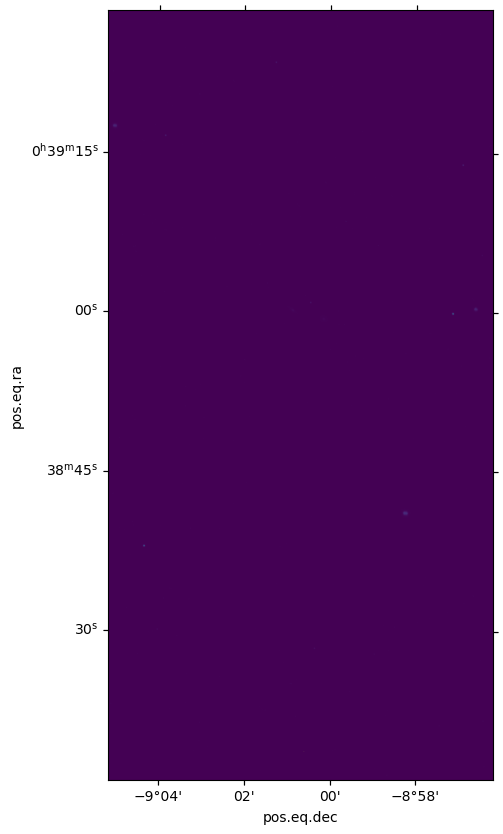

In [29]:
row = image_table_958013_instcals[0]
url = row['access_url']#.decode()
filename = download_file(url, cache=True, show_progress=False)
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
wcs = WCS(hdr)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs)
ax.imshow(image, origin='lower')

Using API url: https://astroarchive.noirlab.edu/api/adv_search/find/?limit=20
https://astroarchive.noirlab.edu/api/retrieve/f5a8a9262eb2333e64fac856e4a126e5/?hdus=59
Filename: C:\Users\ASUS\.astropy\cache\download\url\148f95b632657635a8e8f932cbd8d8ee\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     204   ()      
  1  N28           1 CompImageHDU    125   (2046, 4094)   float32   


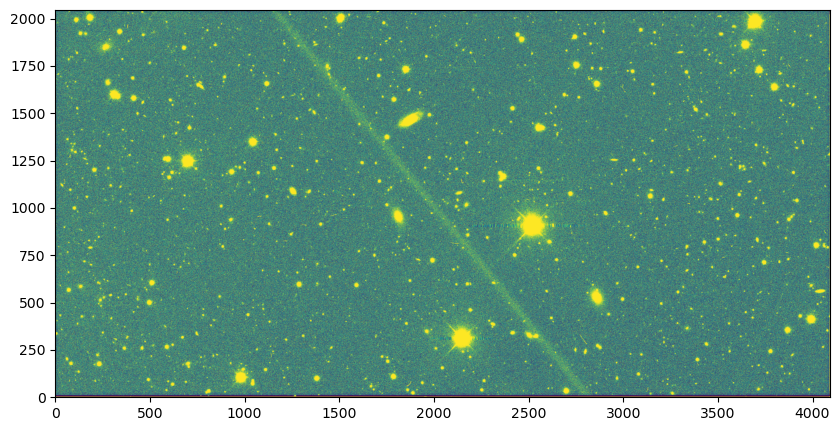

In [32]:
import requests
from astropy.io import fits
from astropy.utils.data import download_file

natroot = 'https://astroarchive.noirlab.edu'
adsurl = f'{natroot}/api/adv_search'

jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        "dateobs_center",
        "dateobs_min",
        "dateobs_max",
        "proc_type",
        "prod_type",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "EXPNUM",
    ],
    "search" : [
        ["instrument", "decam"],
        ["proc_type", "instcal"],
        ["EXPNUM", 958013, 958013],  # requires a range
        ["prod_type", "image"],
    ]
}
apiurl = f'{adsurl}/find/?limit=20'
print(f'Using API url: {apiurl}')
data = requests.post(apiurl,json=jj).json()
query_result = pd.DataFrame(data[1:])  # there should be just 1 row
md5sum = query_result['md5sum'][0]
detector = 59  # set this manually by looking at the DECam detector map
access_url = f'{natroot}/api/retrieve/{md5sum}/?hdus={detector}'
print(access_url)
filename = download_file(access_url, cache=True)
hdu_list = fits.open(filename)
hdu_list.info()
header = hdu_list[0].header
image = hdu_list[1].data

fig = plt.figure(figsize=(10,10))
plt.imshow(np.flip(image.T), origin='lower', vmin = np.percentile(image,5), vmax = np.percentile(image, 95))

In [33]:
filename

'C:\\Users\\ASUS\\.astropy\\cache\\download\\url\\148f95b632657635a8e8f932cbd8d8ee\\contents'

In [34]:
from photutils.background import Background2D, MedianBackground

original image
Thresholded image
blurred image
edge detected image
Contours MAR image
Contours MAR image not found.
Detected line


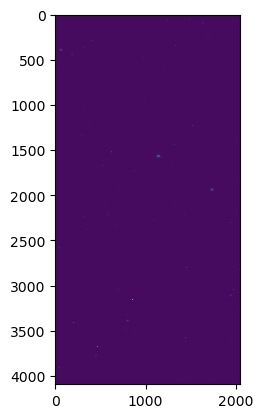

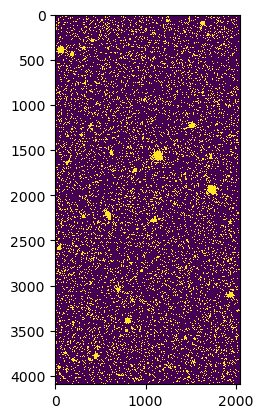

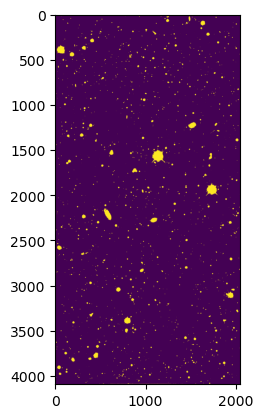

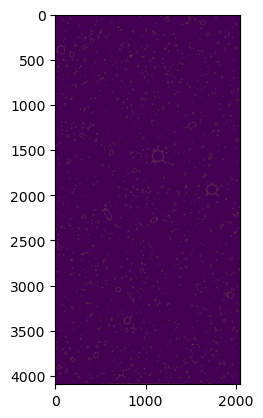

In [45]:
import sys
import os
sys.path.append(os.path.join('C:/', 'Users', 'ASUS', 'Documents', 'GitHub', 'satmetrics'))
import line_detection_updated as ld

lineDetector = ld.LineDetection(hdu_list[1].data)
#lineDetector = ld.LineDetection()  # instantiate the LineDetection class
# load hdu_list as before

lineDetector.image = hdu_list[1].data  # set parameters for running line detection
lineDetector.mask = False
lineDetector.erode = False
lineDetector.erode_threshold = 5
lineDetector.mask_percent = 0.2
lineDetector.nstd1_cut = 2
lineDetector.nstd2_binary_cut = 0.5
lineDetector.threshold = 0.1

  ## run line detection
  ##lined_img, thresholded_img, blurred_img, edges, contour_img, lines = lineDetector.hough_transformation()
  ##lineDetector = ld.LineDetection(hdu_list[1].data)


#Correction?

detections = lineDetector.hough_transformation()

thresholded_img = detections["Thresholded Image"]
blurred_img = detections["Blurred Image"]
edges = detections["Edges"]
#contours_img = detections["Contours MAR Image"]
lines = detections["Lines"]

contours_img = detections.get("Contours MAR Image", None)

# plot the results
print("original image")
ld.show(image, interpolation='none')

print("Thresholded image")
ld.show(thresholded_img, interpolation='none')

print("blurred image")
ld.show(blurred_img)

print("edge detected image")
ld.show(edges)

#print("Contours MAR image")
#ld.show(contours_img)

print("Contours MAR image")
if contours_img is not None:
    ld.show(contours_img)
else:
    print("Contours MAR image not found.")

print("Detected line")

In [68]:
lineDetector

# Try for the expnum with 5 trails (1103448)
RA: 1.516591944	
DEC: -14.29388806

In [49]:
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

In [50]:
ra = 1.516591944
dec = -14.29388806
image_table_1103448 = svc_nsa.search((ra, dec)).to_table()

In [51]:
instcal_filter = (image_table_1103448['proctype'] == 'InstCal')
image_table_1103448_instcals = image_table_1103448[instcal_filter]
#image_table_1103448_instcals

In [52]:
instcal_filter = (image_table_1103448['proctype'] == 'InstCal') & (image_table_1103448['prodtype'] == 'image')
image_table_1103448_instcals = image_table_1103448[instcal_filter]

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


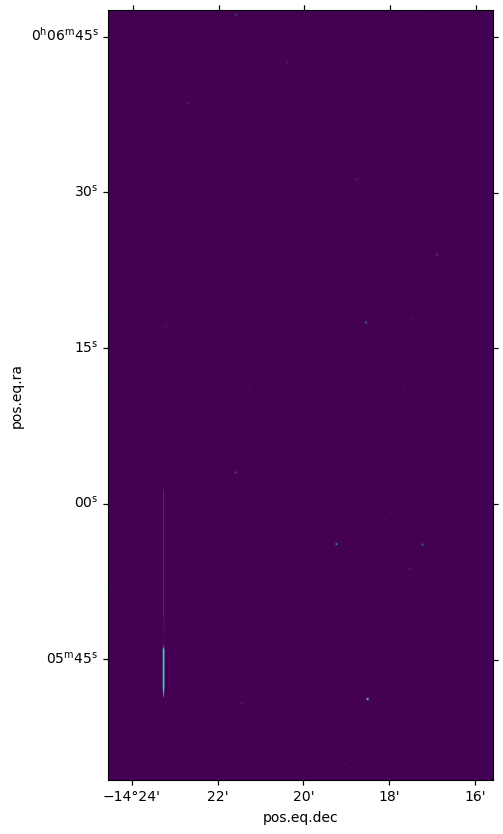

In [53]:
row = image_table_1103448_instcals[0]
url = row['access_url']#.decode()
filename = download_file(url, cache=True, show_progress=False)
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
wcs = WCS(hdr)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs)
ax.imshow(image, origin='lower')

Using API url: https://astroarchive.noirlab.edu/api/adv_search/find/?limit=20
https://astroarchive.noirlab.edu/api/retrieve/0abc5ed0b7bba666354415e8a6498275/?hdus=26
Filename: C:\Users\ASUS\.astropy\cache\download\url\c0bc6f8bf8d47c08c9bd40902ec4dad5\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     189   ()      
  1  S2            1 CompImageHDU    113   (2046, 4094)   float32   


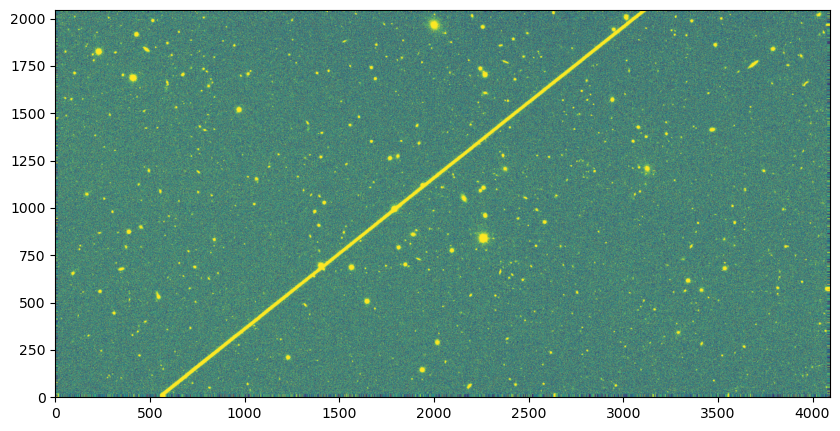

In [54]:
import requests
from astropy.io import fits
from astropy.utils.data import download_file

natroot = 'https://astroarchive.noirlab.edu'
adsurl = f'{natroot}/api/adv_search'

jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        "dateobs_center",
        "dateobs_min",
        "dateobs_max",
        "proc_type",
        "prod_type",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "EXPNUM",
    ],
    "search" : [
        ["instrument", "decam"],
        ["proc_type", "instcal"],
        ["EXPNUM", 1103448, 1103448],  # requires a range
        ["prod_type", "image"],
    ]
}
apiurl = f'{adsurl}/find/?limit=20'
print(f'Using API url: {apiurl}')
data = requests.post(apiurl,json=jj).json()
query_result = pd.DataFrame(data[1:])  # there should be just 1 row
md5sum = query_result['md5sum'][0]
detector = 26  # set this manually by looking at the DECam detector map
access_url = f'{natroot}/api/retrieve/{md5sum}/?hdus={detector}'
print(access_url)
filename = download_file(access_url, cache=True)
hdu_list = fits.open(filename)
hdu_list.info()
header = hdu_list[0].header
image = hdu_list[1].data

fig = plt.figure(figsize=(10,10))
plt.imshow(np.flip(image.T), origin='lower', vmin = np.percentile(image,5), vmax = np.percentile(image, 95))

original image
Thresholded image
blurred image
edge detected image
Contours MAR image
Contours MAR image not found.
Detected line


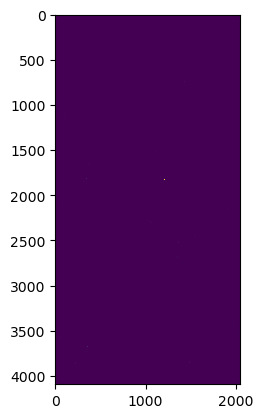

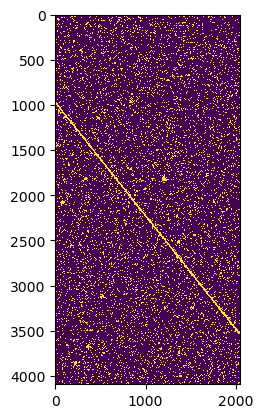

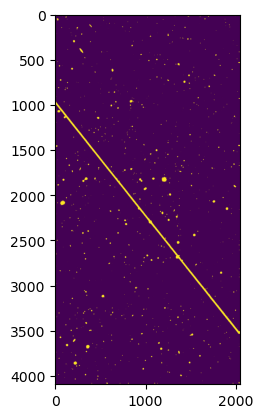

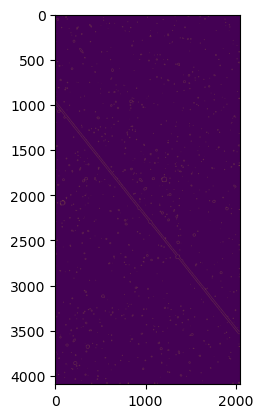

In [55]:
import sys
import os
sys.path.append(os.path.join('C:/', 'Users', 'ASUS', 'Documents', 'GitHub', 'satmetrics'))
import line_detection_updated as ld

lineDetector = ld.LineDetection(hdu_list[1].data)
#lineDetector = ld.LineDetection()  # instantiate the LineDetection class
# load hdu_list as before

lineDetector.image = hdu_list[1].data  # set parameters for running line detection
lineDetector.mask = False
lineDetector.erode = False
lineDetector.erode_threshold = 5
lineDetector.mask_percent = 0.2
lineDetector.nstd1_cut = 2
lineDetector.nstd2_binary_cut = 0.5
lineDetector.threshold = 0.1

  ## run line detection
  ##lined_img, thresholded_img, blurred_img, edges, contour_img, lines = lineDetector.hough_transformation()
  ##lineDetector = ld.LineDetection(hdu_list[1].data)


#Correction?

detections = lineDetector.hough_transformation()

thresholded_img = detections["Thresholded Image"]
blurred_img = detections["Blurred Image"]
edges = detections["Edges"]
#contours_img = detections["Contours MAR Image"]
lines = detections["Lines"]

contours_img = detections.get("Contours MAR Image", None)

# plot the results
print("original image")
ld.show(image, interpolation='none')

print("Thresholded image")
ld.show(thresholded_img, interpolation='none')

print("blurred image")
ld.show(blurred_img)

print("edge detected image")
ld.show(edges)

#print("Contours MAR image")
#ld.show(contours_img)

print("Contours MAR image")
if contours_img is not None:
    ld.show(contours_img)
else:
    print("Contours MAR image not found.")

print("Detected line")

### Question! 
- Is the blurriness of the trail determined by the distance at which it is located? Or does the distance determine how bright it is? What determines whether some lines are brighter?
- Why is it necessary to rotate the image so that the trail is straight? Is it to reduce pixel noise?

# expnum 1134933
RA: 0.307675	
DEC: -12.57163889

In [56]:
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)
ra = 0.307675
dec = -12.57163889
image_table_1134933 = svc_nsa.search((ra, dec)).to_table()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Using API url: https://astroarchive.noirlab.edu/api/adv_search/find/?limit=20
https://astroarchive.noirlab.edu/api/retrieve/0f8e8adff0923e8493bb2f37653c9eef/?hdus=5
Filename: C:\Users\ASUS\.astropy\cache\download\url\1c1eebc352ea7660ff514d1b5df563b5\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     208   ()      
  1  S26           1 CompImageHDU    154   (2046, 4094)   float32   


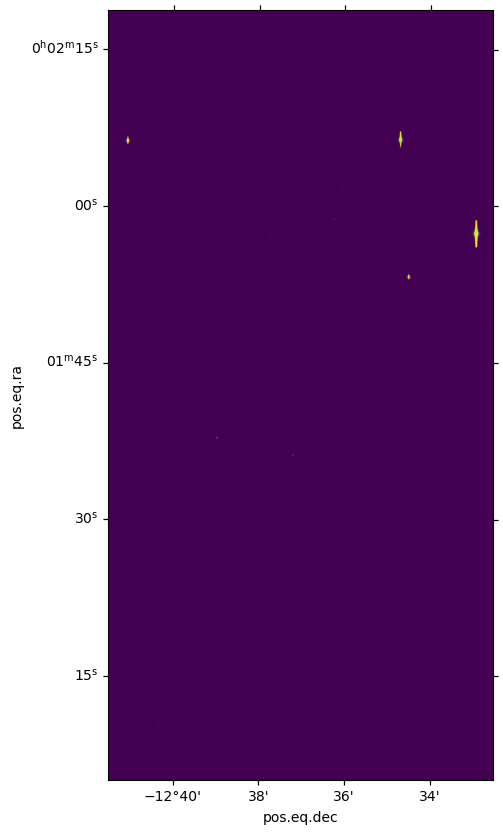

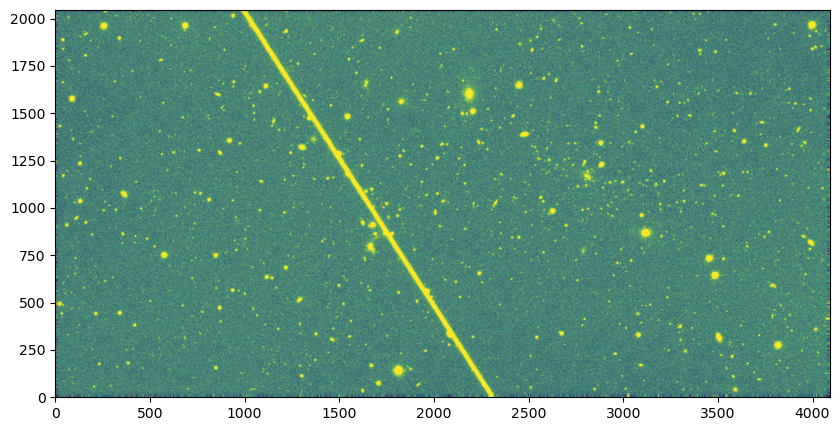

In [57]:
instcal_filter = (image_table_1134933['proctype'] == 'InstCal') & (image_table_1134933['prodtype'] == 'image')
image_table_1134933_instcals = image_table_1134933[instcal_filter]

row = image_table_1134933_instcals[0]
url = row['access_url']#.decode()
filename = download_file(url, cache=True, show_progress=False)
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
wcs = WCS(hdr)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs)
ax.imshow(image, origin='lower')

natroot = 'https://astroarchive.noirlab.edu'
adsurl = f'{natroot}/api/adv_search'

jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        "dateobs_center",
        "dateobs_min",
        "dateobs_max",
        "proc_type",
        "prod_type",
        "obs_type",
        "release_date",
        "proposal",
        "caldat",
        "EXPNUM",
    ],
    "search" : [
        ["instrument", "decam"],
        ["proc_type", "instcal"],
        ["EXPNUM", 1134933, 1134933],  # requires a range
        ["prod_type", "image"],
    ]
}
apiurl = f'{adsurl}/find/?limit=20'
print(f'Using API url: {apiurl}')
data = requests.post(apiurl,json=jj).json()
query_result = pd.DataFrame(data[1:])  # there should be just 1 row
md5sum = query_result['md5sum'][0]
detector = 5  # set this manually by looking at the DECam detector map
access_url = f'{natroot}/api/retrieve/{md5sum}/?hdus={detector}'
print(access_url)
filename = download_file(access_url, cache=True)
hdu_list = fits.open(filename)
hdu_list.info()
header = hdu_list[0].header
image = hdu_list[1].data

fig = plt.figure(figsize=(10,10))
plt.imshow(np.flip(image.T), origin='lower', vmin = np.percentile(image,5), vmax = np.percentile(image, 95))

original image
Thresholded image
blurred image
edge detected image
Contours MAR image
Contours MAR image not found.
Detected line


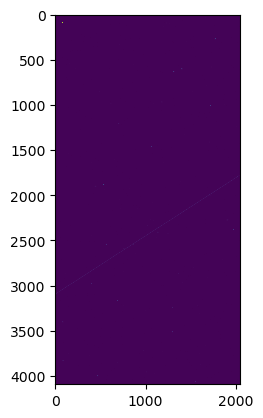

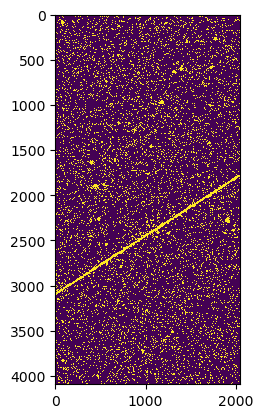

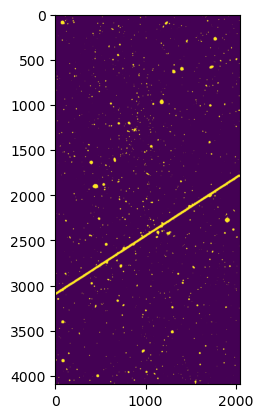

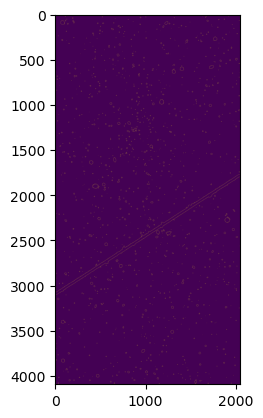

In [58]:
import sys
import os
sys.path.append(os.path.join('C:/', 'Users', 'ASUS', 'Documents', 'GitHub', 'satmetrics'))
import line_detection_updated as ld

lineDetector = ld.LineDetection(hdu_list[1].data)
#lineDetector = ld.LineDetection()  # instantiate the LineDetection class
# load hdu_list as before

lineDetector.image = hdu_list[1].data  # set parameters for running line detection
lineDetector.mask = False
lineDetector.erode = False
lineDetector.erode_threshold = 5
lineDetector.mask_percent = 0.2
lineDetector.nstd1_cut = 2
lineDetector.nstd2_binary_cut = 0.5
lineDetector.threshold = 0.1

  ## run line detection
  ##lined_img, thresholded_img, blurred_img, edges, contour_img, lines = lineDetector.hough_transformation()
  ##lineDetector = ld.LineDetection(hdu_list[1].data)


#Correction?

detections = lineDetector.hough_transformation()

thresholded_img = detections["Thresholded Image"]
blurred_img = detections["Blurred Image"]
edges = detections["Edges"]
#contours_img = detections["Contours MAR Image"]
lines = detections["Lines"]

contours_img = detections.get("Contours MAR Image", None)

# plot the results
print("original image")
ld.show(image, interpolation='none')

print("Thresholded image")
ld.show(thresholded_img, interpolation='none')

print("blurred image")
ld.show(blurred_img)

print("edge detected image")
ld.show(edges)

#print("Contours MAR image")
#ld.show(contours_img)

print("Contours MAR image")
if contours_img is not None:
    ld.show(contours_img)
else:
    print("Contours MAR image not found.")

print("Detected line")